In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import joblib

## Load training data

In [31]:
root_dir = './'
local_path_region = '/bd_mir_regiao_without_xy.csv'
file_path_region = root_dir + local_path_region

df_region = pd.read_csv(file_path_region)

In [32]:
df_region.shape[0]

540

In [33]:
df_region_north = df_region.where(df_region['Region_Name'] =='North').dropna(axis = 0)
df_region_northeast = df_region.where(df_region['Region_Name'] == 'Northeast').dropna(axis = 0)
df_region_southeast = df_region.where(df_region['Region_Name'] == 'Southeast').dropna(axis = 0)

In [34]:
df_region_north_data = df_region_north.drop(['ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_north_target = pd.DataFrame(df_region_north, columns=['Carbon_gkg'])

df_region_northeast_data = df_region_northeast.drop(['ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_northeast_target = pd.DataFrame(df_region_northeast, columns=['Carbon_gkg'])


In [35]:
df_region_southeast_data = df_region_southeast.drop(['ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_southeast_target = pd.DataFrame(df_region_southeast, columns=['Carbon_gkg'])

## Load test data

In [36]:
df_region_test = pd.read_csv('./bd_mir_regiao_test_without_xy.csv')

In [37]:
df_region_test_data = df_region_test.drop(['ID','ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_test_target = pd.DataFrame(df_region_test, columns=['Carbon_gkg'])

In [38]:
df_region_test_north = df_region_test.where(df_region_test['Region_Name'] =='North').dropna(axis = 0)
df_region_test_north_data = df_region_test_north.drop(['ID','ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_test_north_data = df_region_test_north_data.apply(lambda x:np.log(1/x))
df_region_test_north_target = pd.DataFrame(df_region_test_north, columns=['Carbon_gkg'])

In [39]:
df_region_test_northeast = df_region_test.where(df_region_test['Region_Name'] =='Northeast').dropna(axis = 0)
df_region_test_northeast_data = df_region_test_northeast.drop(['ID','ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_test_northeast_data = df_region_test_northeast_data.apply(lambda x:np.log(1/x))
df_region_test_northeast_target = pd.DataFrame(df_region_test_northeast, columns=['Carbon_gkg'])

In [40]:
df_region_test_southeast = df_region_test.where(df_region_test['Region_Name'] =='Southeast').dropna(axis = 0)
df_region_test_southeast_data = df_region_test_southeast.drop(['ID','ID_Unico','Region_Name','Carbon_gkg'], axis=1)
df_region_test_southeast_data = df_region_test_southeast_data.apply(lambda x:np.log(1/x))
df_region_test_southeast_target = pd.DataFrame(df_region_test_southeast, columns=['Carbon_gkg'])

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_region_test_north_data)
df_region_test_north_data_tr = pd.DataFrame(X,columns=df_region_test_north_data.columns)

In [42]:
X = pipeline.fit_transform(df_region_test_northeast_data)
df_region_test_northeast_data_tr = pd.DataFrame(X,columns=df_region_test_northeast_data.columns)

In [43]:
X = pipeline.fit_transform(df_region_test_southeast_data)
df_region_test_southeast_data_tr = pd.DataFrame(X,columns=df_region_test_southeast_data.columns)

## North

### Preprocess

In [44]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

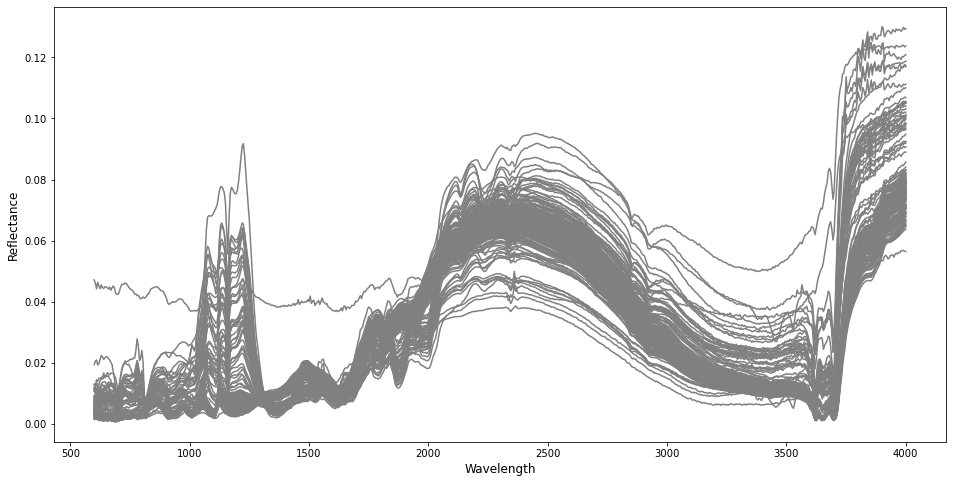

In [45]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_region_north_data)):
    
    test_row = df_region_north_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [46]:
index_ex = df_region_north_data['600'].idxmax()
df_region_north_data = df_region_north_data.drop(index=index_ex)
df_region_north_target = df_region_north_target.drop(index=index_ex)

In [47]:
#Converting data from reflectance values to absorbance values
from math import log, exp

In [48]:
df_region_north_data = df_region_north_data.apply(lambda x:np.log(1/x))

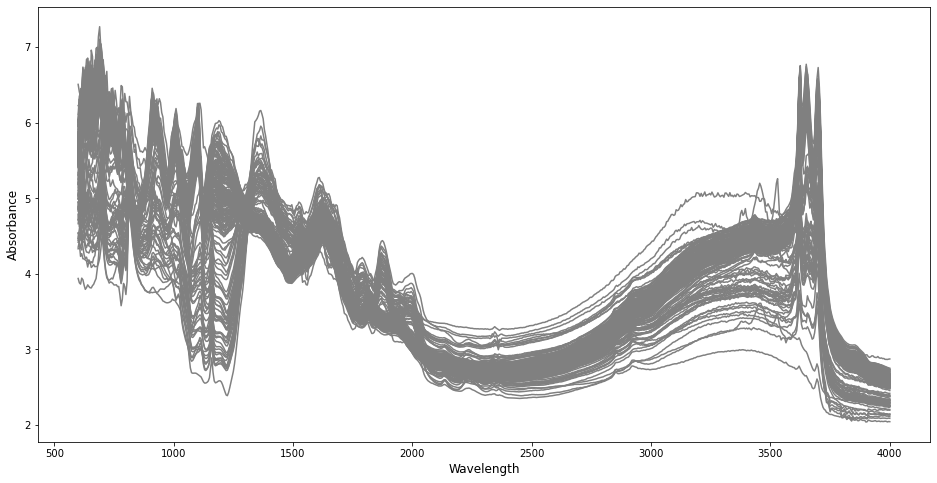

In [49]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_north_data)):
    
    test_row = df_region_north_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [50]:
#savitzky-Golay Filtering
import scipy
from scipy import signal

In [51]:
v = scipy.signal.savgol_filter(df_region_north_data,21,3)
for i in range(len(df_region_north_data)):
    for j in range(len(df_region_north_data.iloc[i])):
        df_region_north_data.iloc[i][j] = v[i][j]

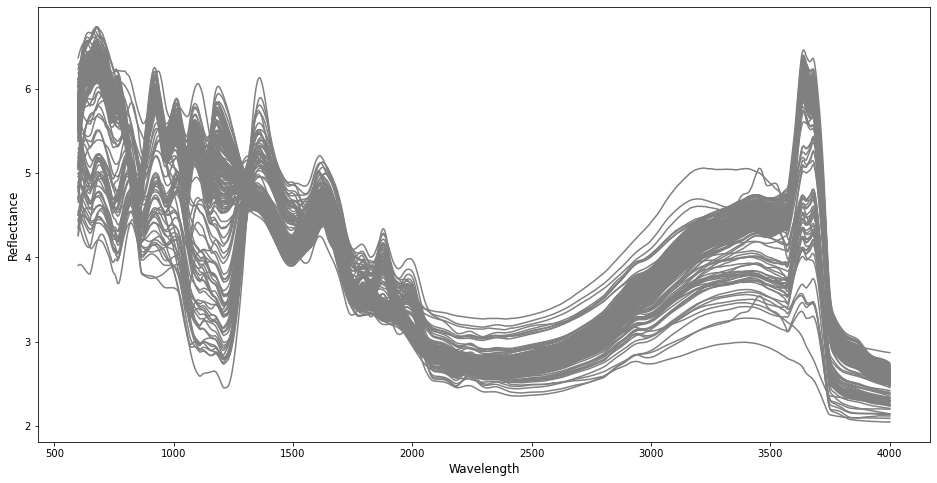

In [52]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_north_data)):
    
    test_row = df_region_north_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [53]:
# standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [54]:
X = pipeline.fit_transform(df_region_north_data)
df_region_north_data_tr = pd.DataFrame(X,columns=df_region_north_data.columns)
df_region_north_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-1.919119,-1.927426,-1.932481,-1.935014,-1.935546,-1.934459,-1.932053,-1.928573,-1.924239,-1.919260,...,-1.964570,-1.944138,-1.923384,-1.901999,-1.879167,-1.852905,-1.818859,-1.768197,-1.684699,-1.543520
1,0.497314,0.502086,0.505823,0.508774,0.511122,0.513006,0.514538,0.515810,0.516903,0.517891,...,0.376823,0.371146,0.362930,0.351457,0.335717,0.314215,0.284694,0.243850,0.187370,0.111370
2,-0.097149,-0.082867,-0.071716,-0.063123,-0.056619,-0.051807,-0.048343,-0.045916,-0.044241,-0.043045,...,0.265642,0.288178,0.308296,0.324544,0.335111,0.337530,0.328219,0.301896,0.251267,0.168478
3,0.370807,0.383396,0.393418,0.401386,0.407702,0.412689,0.416619,0.419725,0.422215,0.424286,...,0.592325,0.614127,0.632391,0.645538,0.651494,0.647269,0.628271,0.587391,0.514303,0.397063
4,-0.202971,-0.278390,-0.335222,-0.376585,-0.404977,-0.422453,-0.430760,-0.431445,-0.425930,-0.415569,...,-0.750944,-0.762772,-0.758343,-0.732627,-0.679066,-0.588728,-0.449306,-0.244602,0.043324,0.424069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.322864,0.326685,0.329662,0.331978,0.333771,0.335143,0.336178,0.336944,0.337500,0.337901,...,0.060307,0.049191,0.037585,0.025715,0.013808,0.002111,-0.009044,-0.019131,-0.027232,-0.031852
175,0.084378,0.092029,0.097782,0.102003,0.104990,0.106991,0.108225,0.108886,0.109156,0.109212,...,0.441454,0.423498,0.405757,0.389106,0.374448,0.362698,0.354691,0.350921,0.350925,0.352228
176,0.866059,0.866221,0.865591,0.864384,0.862745,0.860776,0.858552,0.856133,0.853575,0.850930,...,0.393736,0.441149,0.495125,0.553596,0.614377,0.674733,0.730550,0.774810,0.795242,0.772590
177,0.284040,0.294264,0.301678,0.306815,0.310097,0.311875,0.312449,0.312086,0.311036,0.309541,...,0.591537,0.601712,0.608032,0.608509,0.600581,0.580683,0.543593,0.481677,0.384677,0.242308


### Model 1

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [39]:
scores = []
ne = [1,100,500,1000]
for n in ne:
    forest_reg_north = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_north,df_region_north_data_tr,df_region_north_target,cv=10)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

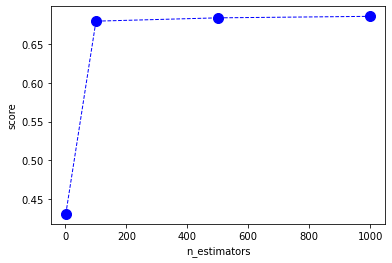

[0.4306811681862072,
 0.6797748681908031,
 0.6840610103143291,
 0.6860130745710054]

In [40]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [41]:
forest_reg_north = RandomForestRegressor(n_estimators=500)
forest_reg_north.fit(df_region_north_data_tr, df_region_north_target)

<ipython-input-41-2ce8a07fe472>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_north.fit(df_region_north_data_tr, df_region_north_target)


RandomForestRegressor(n_estimators=500)

In [47]:
Y = forest_reg_north.predict(df_region_test_north_data_tr)
m = mean_squared_error(df_region_test_north_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_north_target, Y)))

root_mean_squared_error: 8.550697021658173
R2: 0.3943182223937026


In [24]:
import joblib

In [48]:
joblib.dump(forest_reg_north, './model/north/forest_reg_north.pkl')

['./model/north/forest_reg_north.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

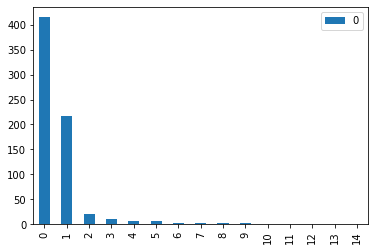

In [49]:
#PCA
df_region_north_data_tr_ = df_region_north_data_tr
ew_north, ev_north = np.linalg.eig(np.cov(df_region_north_data_tr_.T))
ew_north_order = np.argsort(ew_north)[::-1]
ew_north_sort = ew_north[ew_north_order]
ev_north_sort = ev_north[:,ew_north_order]
pd.DataFrame(ew_north_sort[0:15]).plot(kind='bar')

In [181]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [182]:
pca_north = PCA(n_components=15)
pca_north.fit(df_region_north_data_tr)
df_region_north_data_tr_pca = pca_north.transform(df_region_north_data_tr)

ols_north = linear_model.LinearRegression()
ols_north.fit(df_region_north_data_tr_pca, df_region_north_target)

LinearRegression()

In [183]:
df_region_test_north_data_tr_pca = pca_north.transform(df_region_test_north_data_tr)
Y = ols_north.predict(df_region_test_north_data_tr_pca)
m = mean_squared_error(df_region_test_north_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_north_target, Y)))

root_mean_squared_error: 7.258815902171098
R2: 0.5635112696423181


In [184]:
joblib.dump(pca_north, './model/north/pca_north.pkl')

['./model/north/pca_north.pkl']

In [185]:
joblib.dump(ols_north, './model/north/ols_north.pkl')

['./model/north/ols_north.pkl']

In [25]:
#PLsR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [103]:
pls_model_north_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 30)}
gsearch = GridSearchCV(pls_model_north_setup, param_grid)
pls_model_north = gsearch.fit(df_region_north_data_tr, df_region_north_target)

In [104]:
Y = pls_model_north.predict(df_region_test_north_data_tr)
m = mean_squared_error(df_region_test_north_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_north_target, Y)))

root_mean_squared_error: 7.283823357755423
R2: 0.5604985812881966


In [105]:
joblib.dump(pls_model_north, './model/north/pls_model_north.pkl')

['./model/north/pls_model_north.pkl']

#### 'pls_model_north' is the best.

In [27]:
es = joblib.load('./model/total/forest_total.pkl')

In [55]:
Y = es.predict(df_region_test_north_data_tr)
m = mean_squared_error(df_region_test_north_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_north_target, Y)))

root_mean_squared_error: 10.51139804595393
R2: 0.08470216356557914


### Model 2

## Northeast

### Preprocess

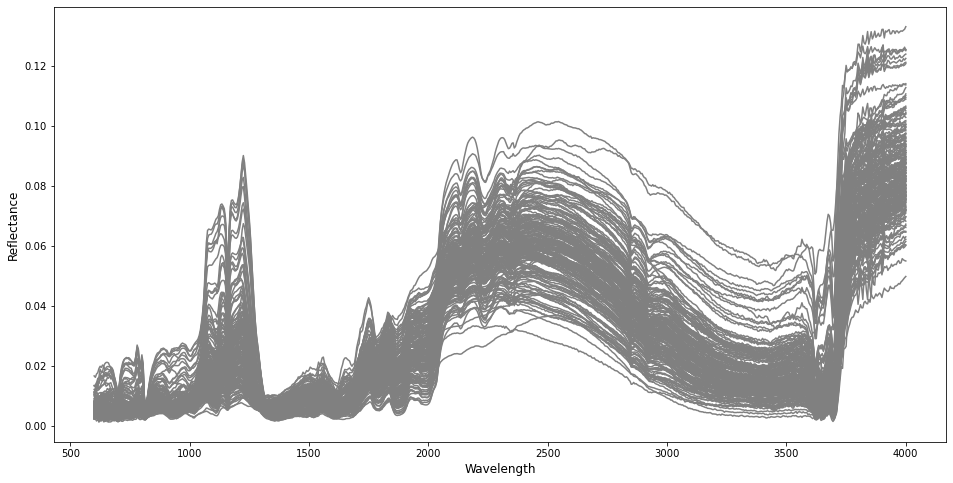

In [56]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
index_col.sort(reverse=True)
plt.figure(figsize = (16, 8))
for i in range(len(df_region_northeast_data)):
    
    test_row = df_region_northeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [57]:
df_region_northeast_data = df_region_northeast_data.apply(lambda x:np.log(1/x))

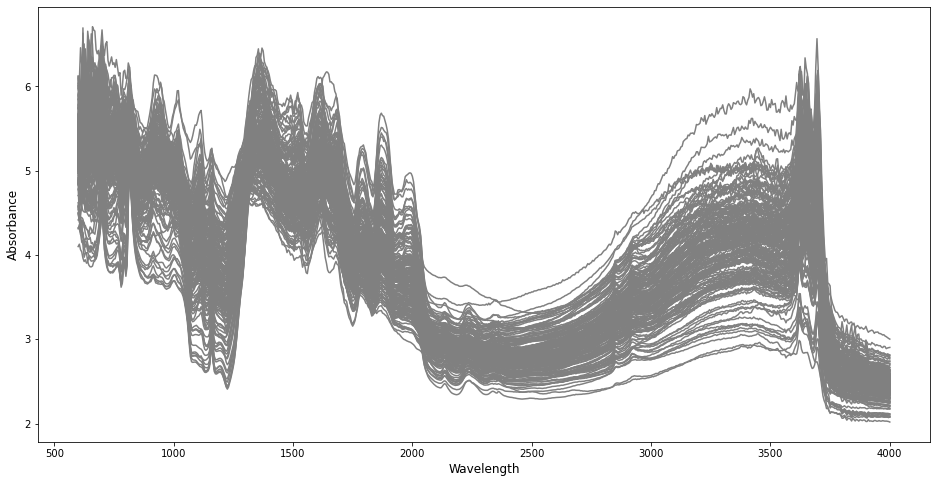

In [58]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_northeast_data)):
    
    test_row = df_region_northeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [59]:
v = scipy.signal.savgol_filter(df_region_northeast_data,21,3)
for i in range(len(df_region_northeast_data)):
    for j in range(len(df_region_northeast_data.iloc[i])):
        df_region_northeast_data.iloc[i][j] = v[i][j]

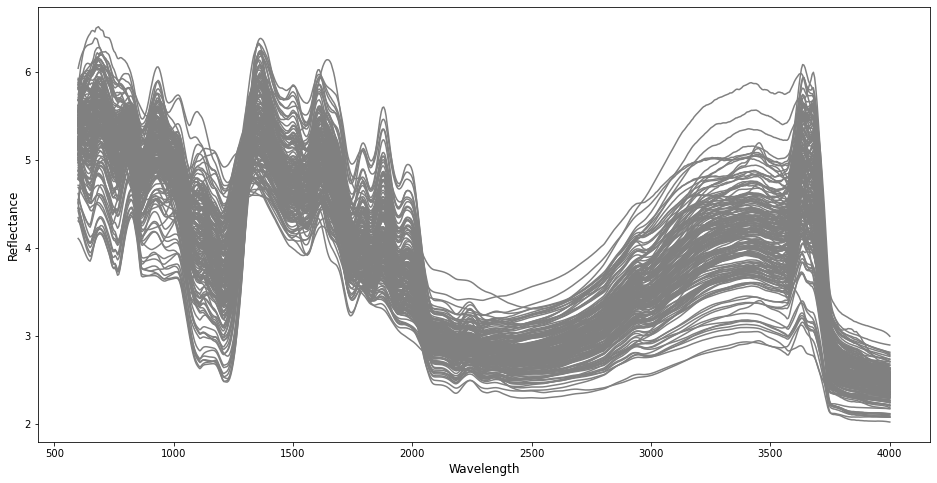

In [60]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_northeast_data)):
    
    test_row = df_region_northeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [61]:
X = pipeline.fit_transform(df_region_northeast_data)
df_region_northeast_data_tr = pd.DataFrame(X,columns=df_region_northeast_data.columns)
df_region_northeast_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.784598,-0.795427,-0.803458,-0.809179,-0.813008,-0.815308,-0.816407,-0.816603,-0.816177,-0.815401,...,-0.018661,-0.035838,-0.059503,-0.089227,-0.124736,-0.165794,-0.211869,-0.261355,-0.310065,-0.349400
1,-0.598963,-0.608145,-0.615612,-0.621676,-0.626598,-0.630600,-0.633878,-0.636606,-0.638945,-0.641047,...,-1.141441,-1.137250,-1.128206,-1.115051,-1.098078,-1.076726,-1.048835,-1.009466,-0.949671,-0.857470
2,0.577705,0.575283,0.572798,0.570278,0.567722,0.565106,0.562390,0.559527,0.556465,0.553152,...,0.818342,0.834932,0.846875,0.853107,0.851925,0.840472,0.813922,0.764446,0.680793,0.551324
3,-0.615944,-0.649915,-0.677349,-0.699254,-0.716542,-0.730048,-0.740545,-0.748761,-0.755390,-0.761103,...,-0.228446,-0.241327,-0.259109,-0.281255,-0.307240,-0.336350,-0.367236,-0.397045,-0.420029,-0.426563
4,-2.363828,-2.367647,-2.369394,-2.369652,-2.368850,-2.367305,-2.365257,-2.362899,-2.360392,-2.357881,...,-2.788237,-2.786264,-2.786577,-2.788916,-2.792137,-2.792975,-2.783712,-2.748201,-2.657033,-2.468193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1.480455,-1.482933,-1.485233,-1.487607,-1.490220,-1.493169,-1.496513,-1.500277,-1.504470,-1.509088,...,-0.829092,-0.815283,-0.809661,-0.814372,-0.831948,-0.865196,-0.916655,-0.987001,-1.071473,-1.154619
176,1.525023,1.492462,1.464847,1.441588,1.422058,1.405609,1.391590,1.379352,1.368254,1.357669,...,-0.067312,-0.096904,-0.136883,-0.187413,-0.249022,-0.322471,-0.408244,-0.505176,-0.607488,-0.700589
177,0.285159,0.268859,0.255353,0.244253,0.235181,0.227770,0.221668,0.216530,0.212024,0.207824,...,-0.721466,-0.734664,-0.747213,-0.758087,-0.765816,-0.768025,-0.760657,-0.736837,-0.685940,-0.595310
178,-0.851246,-0.871893,-0.888609,-0.902070,-0.912868,-0.921526,-0.928519,-0.934284,-0.939233,-0.943759,...,0.077401,0.078612,0.073253,0.061260,0.042277,0.015616,-0.019686,-0.064519,-0.118602,-0.178244


### Model 1

In [31]:
#RF
scores = []
ne = [1,100,500,800,1000,2000]
for n in ne:
    forest_reg_northeast = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_northeast,df_region_northeast_data_tr,df_region_northeast_target,cv=10)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

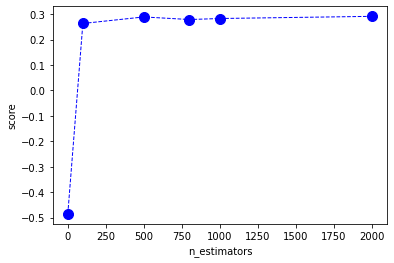

[-0.4856618896485193,
 0.26317270675084203,
 0.2888349421369759,
 0.2786484806608267,
 0.2826837962457942,
 0.2912011608359227]

In [32]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [33]:
forest_reg_northeast = RandomForestRegressor(n_estimators=500)
forest_reg_northeast.fit(df_region_northeast_data_tr, df_region_northeast_target)

<ipython-input-33-131dd028bffb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_northeast.fit(df_region_northeast_data_tr, df_region_northeast_target)


RandomForestRegressor(n_estimators=500)

In [35]:
joblib.dump(forest_reg_northeast, './model/forest_reg_northeast.pkl')

['./model/forest_reg_northeast.pkl']

In [107]:
es = joblib.load( './model/northeast/forest_reg_northeast.pkl')

In [108]:
Y = es.predict(df_region_test_northeast_data_tr)
m = mean_squared_error(df_region_test_northeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_northeast_target, Y)))

root_mean_squared_error: 8.47140169792945
R2: 0.3171533636595647


D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

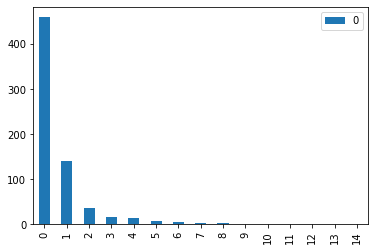

In [187]:
#PCA
df_region_northeast_data_tr_ = df_region_northeast_data_tr
ew_northeast, ev_northeast = np.linalg.eig(np.cov(df_region_northeast_data_tr_.T))
ew_northeast_order = np.argsort(ew_northeast)[::-1]
ew_northeast_sort = ew_northeast[ew_northeast_order]
ev_northeast_sort = ev_northeast[:,ew_northeast_order]
pd.DataFrame(ew_northeast_sort[0:15]).plot(kind='bar')

In [188]:
pca_northeast = PCA(n_components=31)
pca_northeast.fit(df_region_northeast_data_tr)
df_region_northeast_data_tr_pca = pca_northeast.transform(df_region_northeast_data_tr)

ols_northeast = linear_model.LinearRegression()

ols_northeast.fit(df_region_northeast_data_tr_pca, df_region_northeast_target)

LinearRegression()

In [189]:
df_region_test_northeast_data_tr_pca = pca_northeast.transform(df_region_test_northeast_data_tr)
Y = ols_northeast.predict(df_region_test_northeast_data_tr_pca)
m = mean_squared_error(df_region_test_northeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_northeast_target, Y)))

root_mean_squared_error: 7.7090095354263255
R2: 0.43452971395161744


In [190]:
joblib.dump(pca_northeast, './model/northeast/pca_northeast.pkl')

['./model/northeast/pca_northeast.pkl']

In [191]:
joblib.dump(ols_northeast, './model/northeast/ols_northeast.pkl')

['./model/northeast/ols_northeast.pkl']

In [229]:
#PLs

In [226]:
pls_model_northeast_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 35)}
gsearch = GridSearchCV(pls_model_northeast_setup, param_grid)
pls_model_northeast = gsearch.fit(df_region_northeast_data_tr, df_region_northeast_target)

In [227]:
Y = pls_model_northeast.predict(df_region_test_northeast_data_tr)
m = mean_squared_error(df_region_test_northeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_northeast_target, Y)))

root_mean_squared_error: 8.253534404411655
R2: 0.35182458405646055


In [228]:
joblib.dump(pls_model_northeast, './model/northeast/pls_model_northeast.pkl')

['./model/northeast/pls_model_northeast.pkl']

#### 'ols_northeast' is the best.

In [62]:
Y = es.predict(df_region_test_northeast_data_tr)
m = mean_squared_error(df_region_test_northeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_northeast_target, Y)))

root_mean_squared_error: 9.175244136622002
R2: 0.19897166115016252


### Model 2

## southeast

### Preprocess

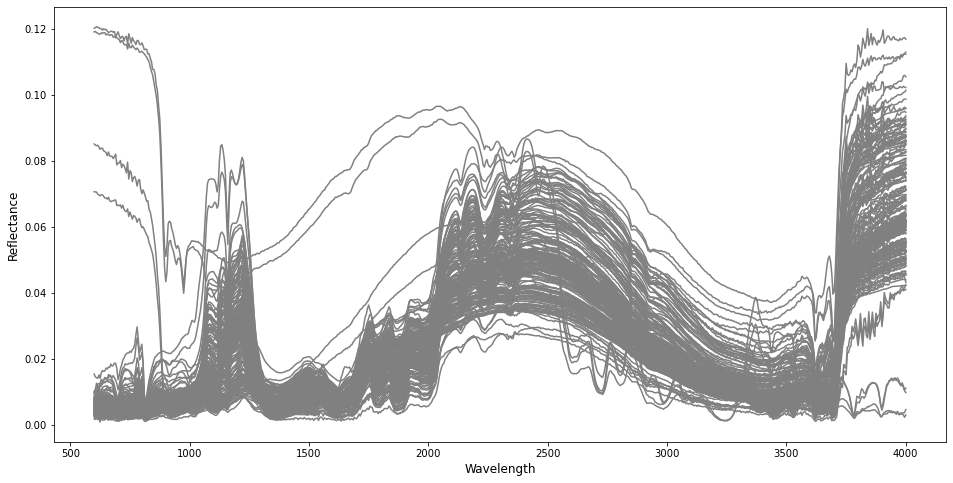

In [63]:

plt.figure(figsize = (16, 8))
for i in range(len(df_region_southeast_data)):
    
    test_row = df_region_southeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [64]:
index_ex = df_region_southeast_data['600'].idxmax()
df_region_southeast_data = df_region_southeast_data.drop(index=index_ex)
df_region_southeast_target = df_region_southeast_target.drop(index=index_ex)

In [65]:
index_ex = df_region_southeast_data['600'].idxmax()
df_region_southeast_data = df_region_southeast_data.drop(index=index_ex)
df_region_southeast_target = df_region_southeast_target.drop(index=index_ex)

In [66]:
index_ex = df_region_north_data['600'].idxmax()
df_region_north_data = df_region_north_data.drop(index=index_ex)
df_region_north_target = df_region_north_target.drop(index=index_ex)

In [67]:
index_ex = df_region_southeast_data['600'].idxmax()
df_region_southeast_data = df_region_southeast_data.drop(index=index_ex)
df_region_southeast_target = df_region_southeast_target.drop(index=index_ex)

In [68]:
index_ex = df_region_southeast_data['600'].idxmax()
df_region_southeast_data = df_region_southeast_data.drop(index=index_ex)
df_region_southeast_target = df_region_southeast_target.drop(index=index_ex)

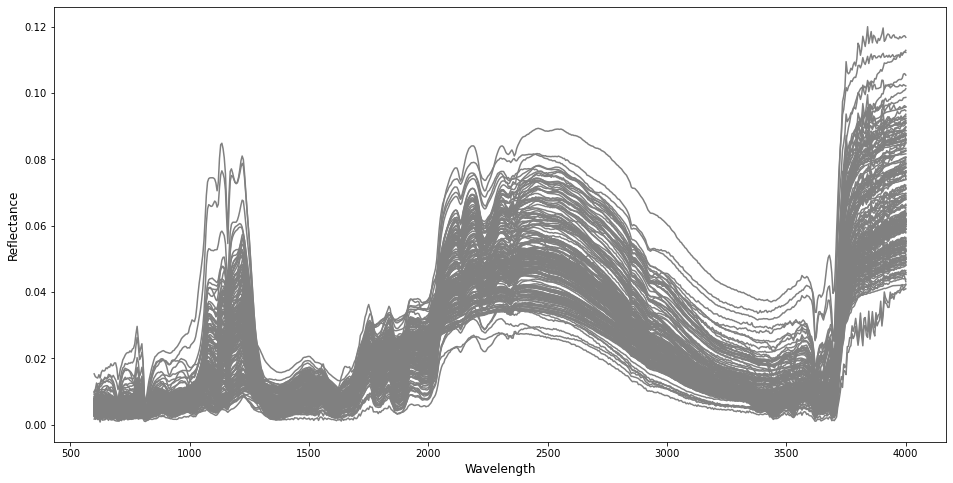

In [69]:

plt.figure(figsize = (16, 8))
for i in range(len(df_region_southeast_data)):
    
    test_row = df_region_southeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [70]:
df_region_southeast_data = df_region_southeast_data.apply(lambda x:np.log(1/x))

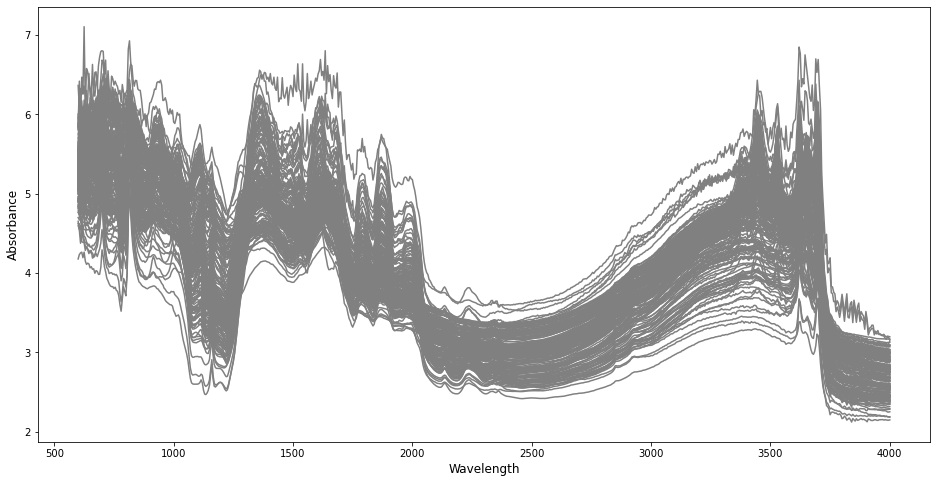

In [71]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_southeast_data)):
    
    test_row = df_region_southeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [72]:
v = scipy.signal.savgol_filter(df_region_southeast_data,21,3)
for i in range(len(df_region_southeast_data)):
    for j in range(len(df_region_southeast_data.iloc[i])):
        df_region_southeast_data.iloc[i][j] = v[i][j]

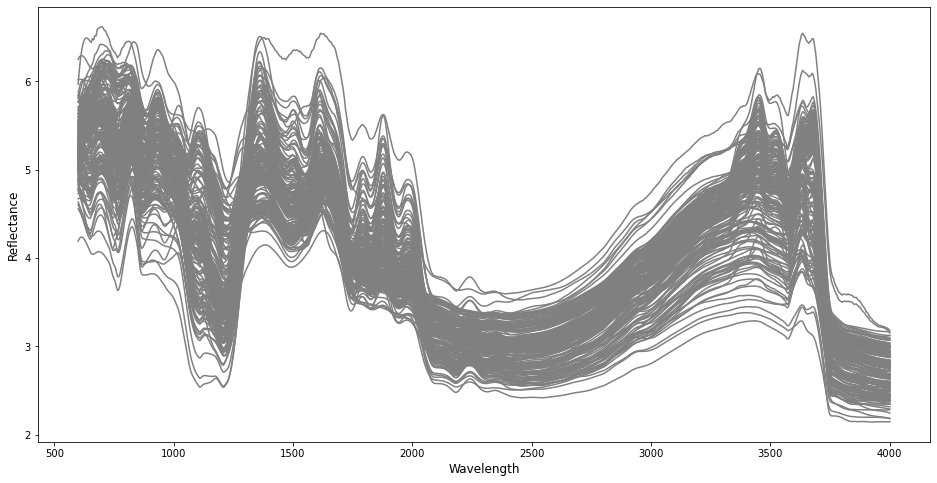

In [73]:
plt.figure(figsize = (16, 8))
for i in range(len(df_region_southeast_data)):
    
    test_row = df_region_southeast_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [74]:
X = pipeline.fit_transform(df_region_southeast_data)
df_region_southeast_data_tr = pd.DataFrame(X,columns=df_region_southeast_data.columns)
df_region_southeast_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.919857,-0.917360,-0.915872,-0.915314,-0.915584,-0.916567,-0.918135,-0.920157,-0.922493,-0.925007,...,-0.903792,-0.903700,-0.911250,-0.926389,-0.949053,-0.978905,-1.014812,-1.053898,-1.090116,-1.112894
1,-0.932170,-0.931735,-0.930845,-0.929505,-0.927700,-0.925402,-0.922572,-0.919167,-0.915139,-0.910444,...,1.931121,2.052189,2.190903,2.348929,2.527776,2.727999,2.947473,3.178096,3.400477,3.578301
2,1.273889,1.272534,1.271604,1.271067,1.270863,1.270913,1.271123,1.271391,1.271609,1.271670,...,1.367343,1.334429,1.300889,1.267133,1.233518,1.200182,1.166723,1.131667,1.091805,1.041919
3,-0.129974,-0.109729,-0.092687,-0.078511,-0.066858,-0.057382,-0.049735,-0.043571,-0.038540,-0.034299,...,0.893365,0.921917,0.952357,0.984912,1.019615,1.056025,1.092697,1.126246,1.150048,1.153317
4,-1.096160,-1.096168,-1.096646,-1.097576,-1.098920,-1.100621,-1.102610,-1.104809,-1.107137,-1.109510,...,-1.435627,-1.473832,-1.517832,-1.566492,-1.618182,-1.670219,-1.717915,-1.753085,-1.762235,-1.725983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1.329357,1.328916,1.328444,1.327966,1.327475,1.326947,1.326340,1.325606,1.324689,1.323533,...,0.822662,0.773011,0.717399,0.655357,0.586251,0.509268,0.423474,0.328081,0.223225,0.111536
171,1.367478,1.365521,1.363475,1.361387,1.359272,1.357126,1.354931,1.352658,1.350273,1.347741,...,0.730515,0.682885,0.628194,0.565809,0.494889,0.414381,0.323118,0.220188,0.105919,-0.016245
172,-0.588537,-0.586816,-0.585445,-0.584456,-0.583862,-0.583672,-0.583884,-0.584494,-0.585494,-0.586873,...,-0.450692,-0.459368,-0.466979,-0.472471,-0.474455,-0.471019,-0.459477,-0.436104,-0.396120,-0.334583
173,-1.430179,-1.436411,-1.441194,-1.444785,-1.447414,-1.449288,-1.450597,-1.451522,-1.452234,-1.452906,...,-1.931464,-1.948200,-1.967388,-1.988051,-2.008666,-2.026608,-2.037201,-2.032272,-1.998546,-1.917517


### Model 1

In [308]:
#RF
scores = []
ne = [10,100,500,800,1000]
for n in ne:
    forest_reg_southeast = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_southeast,df_region_southeast_data_tr,df_region_southeast_target,cv=10)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

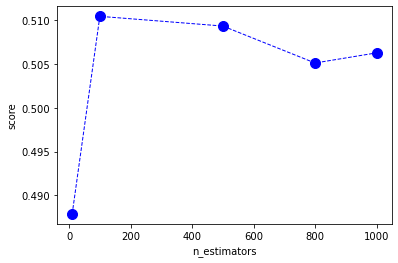

[0.48788568752352635,
 0.5104283813791438,
 0.5093226544737208,
 0.5051071144565851,
 0.5062619414191043]

In [309]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [310]:
forest_reg_southeast = RandomForestRegressor(n_estimators=100)
forest_reg_southeast.fit(df_region_southeast_data_tr, df_region_southeast_target)

<ipython-input-310-42cbd206d683>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_southeast.fit(df_region_southeast_data_tr, df_region_southeast_target)


RandomForestRegressor()

In [311]:
Y = forest_reg_southeast.predict(df_region_test_southeast_data_tr)
m = mean_squared_error(df_region_test_southeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_southeast_target, Y)))

root_mean_squared_error: 4.204820081905404
R2: 0.590251610935927


In [312]:
joblib.dump(forest_reg_southeast, './model/southeast/forest_reg_southeast.pkl')

['./model/southeast/forest_reg_southeast.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

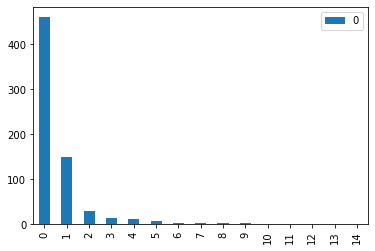

In [193]:
#PCA
df_region_southeast_data_tr_ = df_region_southeast_data_tr
ew_southeast, ev_southeast = np.linalg.eig(np.cov(df_region_southeast_data_tr_.T))
ew_southeast_order = np.argsort(ew_southeast)[::-1]
ew_southeast_sort = ew_southeast[ew_southeast_order]
ev_southeast_sort = ev_southeast[:,ew_southeast_order]
pd.DataFrame(ew_southeast_sort[0:15]).plot(kind='bar')

In [194]:
pca_southeast = PCA(n_components=4)
pca_southeast.fit(df_region_southeast_data_tr)
df_region_southeast_data_tr_pca = pca_southeast.transform(df_region_southeast_data_tr)

ols_southeast = linear_model.LinearRegression()
ols_southeast.fit(df_region_southeast_data_tr_pca, df_region_southeast_target)

LinearRegression()

In [195]:
df_region_test_southeast_data_tr_pca = pca_southeast.transform(df_region_test_southeast_data_tr)
Y = ols_southeast.predict(df_region_test_southeast_data_tr_pca)
m = mean_squared_error(df_region_test_southeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_southeast_target, Y)))

root_mean_squared_error: 4.077173993188056
R2: 0.6147515411167057


In [196]:
joblib.dump(ols_southeast, './model/southeast/ols_southeast.pkl')

['./model/southeast/ols_southeast.pkl']

In [197]:
joblib.dump(pca_southeast, './model/southeast/pca_southeast')

['./model/southeast/pca_southeast']

In [198]:
#PLSR

In [199]:
pls_model_southeast_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 20)}
gsearch = GridSearchCV(pls_model_southeast_setup, param_grid)
pls_model_southeast = gsearch.fit(df_region_southeast_data_tr, df_region_southeast_target)

In [200]:
Y = pls_model_southeast.predict(df_region_test_southeast_data_tr)
m = mean_squared_error(df_region_test_southeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_southeast_target, Y)))

root_mean_squared_error: 4.720825759525456
R2: 0.48351422801880484


In [201]:
joblib.dump(pls_model_southeast, './model/southeast/pls_model_southeast.pkl')

['./model/southeast/pls_model_southeast.pkl']

#### 'ols_southeast' is the best.

In [75]:
Y = es.predict(df_region_test_southeast_data_tr)
m = mean_squared_error(df_region_test_southeast_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_region_test_southeast_target, Y)))

root_mean_squared_error: 5.347222626568588
R2: 0.3373580120853783


## All data

In [69]:
df_data_total = pd.concat([df_region_north_data_tr,df_region_northeast_data_tr,df_region_southeast_data_tr])

In [71]:
df_target_total = pd.concat([df_region_north_target,df_region_northeast_target,df_region_southeast_target])

In [72]:
df_test_data_total = pd.concat([df_region_test_north_data_tr,df_region_test_northeast_data_tr,df_region_test_southeast_data_tr])

In [73]:
df_test_target_total = pd.concat([df_region_test_north_target,df_region_test_northeast_target,df_region_test_southeast_target])

### Model 1

In [74]:
#RF
scores = []
ne = [10,100,500,1000]
for n in ne:
    forest_reg_region = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_region,df_data_total,df_target_total,cv=10)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

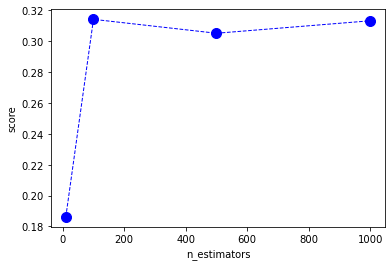

[0.18613681939018362,
 0.3141911384147823,
 0.3051756479398734,
 0.31325008955966754]

In [75]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [77]:
forest_reg_region = RandomForestRegressor(n_estimators=100)
forest_reg_region.fit(df_data_total,df_target_total)

<ipython-input-77-dcdc2f961ad3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_region.fit(df_data_total,df_target_total)


RandomForestRegressor()

In [82]:
Y = forest_reg_region.predict(df_test_data_total)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.407839021608973
R2: 0.3690165195142945


In [202]:
joblib.dump(forest_reg_region, './model/region/forest_reg_region.pkl')

['./model/region/forest_reg_region.pkl']

D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

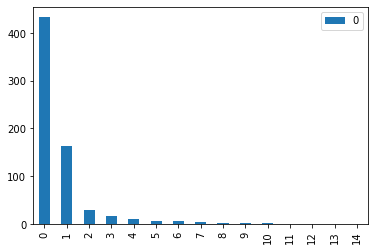

In [80]:
#PCA

ew_region, ev_region = np.linalg.eig(np.cov(df_data_total.T))
ew_region_order = np.argsort(ew_region)[::-1]
ew_region_sort = ew_region[ew_region_order]
ev_region_sort = ev_region[:,ew_region_order]
pd.DataFrame(ew_region_sort[0:15]).plot(kind='bar')

In [176]:
pca_region = PCA(n_components=20)
pca_region.fit(df_data_total)
df_data_total_pca = pca_region.transform(df_data_total)

ols_region = linear_model.LinearRegression()
ols_region.fit(df_data_total_pca, df_target_total)

LinearRegression()

In [177]:
df_test_data_total_pca = pca_region.transform(df_test_data_total)
Y = ols_region.predict(df_test_data_total_pca)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.52262310118045
R2: 0.3516705059421752


In [203]:
joblib.dump(pca_region, './model/region/pca_region.pkl')

['./model/region/pca_region.pkl']

In [204]:
joblib.dump(ols_region, './model/region/ols_region.pkl')

['./model/region/ols_region.pkl']

In [178]:
#PLSR
pls_model_region_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 20)}
gsearch = GridSearchCV(pls_model_region_setup, param_grid)
pls_model_region = gsearch.fit(df_data_total, df_target_total)

In [179]:
Y = pls_model_region.predict(df_test_data_total)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.558584125957777
R2: 0.3461877383871539


In [205]:
joblib.dump(pls_model_region, './model/region/pls_model_region')

['./model/region/pls_model_region']

In [82]:
Y = es.predict(df_test_data_total)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.626845380655041
R2: 0.3357168417928773


In [83]:
es_h = joblib.load('./model/southeast/ols_southeast.pkl')

In [ ]:
pca_h = joblib.load('./model/southeast/pca_southeast')
df_test_data_total_p = pca_h.trans

In [84]:
Y = es_h.predict(df_test_data_total)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 681)

### Model 2

In [206]:
def band_select(df):
    index_2268 = []
    for i in range(2265,2391,5):
        index_2268.append(str(i))
    index_2268.sort(reverse=True)
    indexs_bands = index_2268
    indexs_bands.extend(['630','625','620','615','610','605','600'])
    df_band = pd.DataFrame(df,columns=indexs_bands)
    return df_band

In [207]:
df_data_total_628 = band_select(df_data_total)
df_test_data_total_628 = band_select(df_test_data_total)

In [208]:
forest_reg_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,100,500,1000]}
gsearch = GridSearchCV(forest_reg_setup, param_grid)
forest_reg_region_628 = gsearch.fit(df_data_total_628, df_target_total)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [211]:
Y = forest_reg_region_628.predict(df_test_data_total_628)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 9.373809710931484
R2: 0.21570132838473088


### Model 3

In [215]:
# Use Lasso to find important features
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [216]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100,200,500]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_data_total, df_target_total)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9309.820725332424, tolerance: 3.9367235374827203
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9484.017110273997, tolerance: 3.993560708774605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9224.945171043983, tolerance: 3.982788125187377
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordin

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10937.110707287658, tolerance: 4.4909161981855314
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10902.2622919115, tolerance: 4.470074250309354
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11008.628555924284, tolerance: 4.516314343640882
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordi

{'alpha': 0.01}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.4641298084425, tolerance: 4.641512025461823
  model = cd_fast.enet_coordinate_descent(


In [222]:
para = {'alpha':[0.01,0.05,0.08,0.1,0.2,0.5]}
lassore = GridSearchCV(lasso, para, cv=10)
lassore.fit(df_data_total, df_target_total)
print(lassore.best_params_)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.8036476425968, tolerance: 3.9367235374827203
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829.0423887598299, tolerance: 3.993560708774605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497.07160784193184, tolerance: 3.982788125187377
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordi

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.505934927659837, tolerance: 4.516314343640882
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.058511003247986, tolerance: 3.9367235374827203
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.1005001625781, tolerance: 3.993560708774605
  model = cd_fast.enet_coordinate_descent(
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordina

{'alpha': 0.1}


D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.473203895297047, tolerance: 4.641512025461823
  model = cd_fast.enet_coordinate_descent(


In [223]:
lasso = Lasso(alpha=0.1)
lasso.fit(df_data_total,df_target_total)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.473203895297047, tolerance: 4.641512025461823
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [224]:
Y = lasso.predict(df_test_data_total)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.555921156951984
R2: 0.34659453719811795


In [225]:
rele = np.round(lasso.coef_,5)

In [228]:
df_data_tr = pd.DataFrame(df_data_total,columns=df_data_total.columns)
indices = np.argsort(rele)[::-1]
cols = df_data_tr.columns[0:]
for f in range(15):
    print("%2d) %-*s %f" % (f + 1, 40, cols[indices[f]], rele[indices[f]]))

 1) 740                                      2.793910
 2) 4000                                     2.772450
 3) 1575                                     2.634070
 4) 1405                                     1.714360
 5) 1385                                     0.639190
 6) 870                                      0.604960
 7) 625                                      0.347240
 8) 1295                                     0.161900
 9) 1055                                     0.139350
10) 2635                                     0.129250
11) 1300                                     0.107140
12) 3115                                     -0.000000
13) 2855                                     0.000000
14) 2865                                     0.000000
15) 2870                                     0.000000


In [229]:
def lasso_bands(df,num):
    index_lasso = []
    for f in range(num):
        index_lasso.append(str(cols[indices[f]]))
    df_bands_lasso = pd.DataFrame(df,columns=index_lasso)
    return df_bands_lasso

In [230]:
df_data_total_lasso = lasso_bands(df_data_total,11)
df_test_data_total_lasso = lasso_bands(df_test_data_total,11)

In [231]:
forest_reg_setup = RandomForestRegressor()
param_grid = {'n_estimators': [10,50,100]}
gsearch = GridSearchCV(forest_reg_setup, param_grid)
forest_reg_region_lasso = gsearch.fit(df_data_total_lasso, df_target_total)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

In [232]:
Y = forest_reg_region_lasso.predict(df_test_data_total_lasso)
m = mean_squared_error(df_test_target_total, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_test_target_total, Y)))

root_mean_squared_error: 8.721468689391061
R2: 0.32106458169524055


### 'forest_reg_region' is the best.